#### Download Flowers dataset

In [1]:
# #You can download the data manually as well instead of using 'wget'
# !wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

In [2]:
# #Check if file is downloaded
# !ls -l

In [3]:
# #Unzip the data
# !tar -xf flower_photos.tgz

In [4]:
!ls -l flower_photos/dandelion/

total 98080
-rw-r-----@ 1 vidyadharbendre  staff   26694 Jan 11  2016 10043234166_e6dd915111_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff   23321 Jan 11  2016 10200780773_c6051a7d71_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff   21655 Jan 11  2016 10294487385_92a0676c7d_m.jpg
-rw-r-----@ 1 vidyadharbendre  staff  133778 Jan 11  2016 10437652486_aa86c14985.jpg
-rw-r-----@ 1 vidyadharbendre  staff   26149 Jan 11  2016 10443973_aeb97513fc_m.jpg
-rw-r-----@ 1 vidyadharbendre  staff   19841 Jan 11  2016 10477378514_9ffbcec4cf_m.jpg
-rw-r-----@ 1 vidyadharbendre  staff   32416 Jan 11  2016 10486992895_20b344ce2d_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff   43440 Jan 11  2016 10617162044_8740d4dd9f_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff   49709 Jan 11  2016 10617191174_9a01753241_n.jpg
-rw-r-----@ 1 vidyadharbendre  staff   57640 Jan 11  2016 10683189_bd6e371b97.jpg
-rw-r-----@ 1 vidyadharbendre  staff   69533 Jan 11  2016 1074999133_1e4a1e042e.jpg
-rw-r-----@ 1 vidyadharbendre  staff  103155

#### Load image from the disk

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

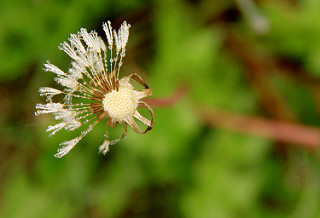

In [6]:
#Load an image using Keras image class
image_file = 'flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)

#Inspect image
flower_image

In [7]:
flower_array.shape

(218, 320, 3)

Build a function to display Original and Transformed Image

In [8]:
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

### Flip an image

In [9]:
#Create a ImageDataGenerator by specifying the augmentation
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [10]:
#Feed numpy array to ImageDataGenerator to transfor
transformed_array = transform_fn.random_transform(flower_array)

#Convert array to image
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

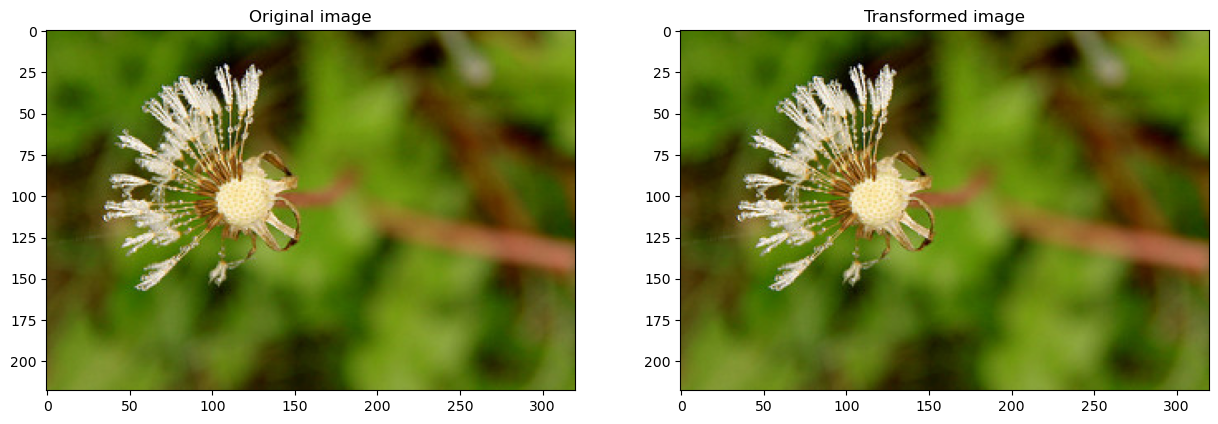

In [11]:
#Show both original and transormed image
plot_images(flower_image, transformed_image)

In [12]:
type(transformed_image)

PIL.Image.Image

In [13]:
transformed_image.save("abc_new.jpg")

In [14]:
!ls -l

total 644784
-rw-rw-r--@ 1 vidyadharbendre  staff      32125 Mar 22 20:05 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff      80277 Mar 22 22:09 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-rw-r--@ 1 vidyadharbendre  staff    1269188 Mar 22 21:07 2a. Visualize an Image.ipynb
-rw-------@ 1 vidyadharbendre  staff      54372 Mar 23 11:07 2b. Image_Classification_CNN.ipynb
-rw-rw-r--@ 1 vidyadharbendre  staff      39149 Mar 23 10:15 2c. Image Classification - Flowers.ipynb
-rw-rw-r--@ 1 vidyadharbendre  staff       6691 Mar 18  2022 3a. Image Augmentation.ipynb
-rw-rw-r--@ 1 vidyadharbendre  staff     804815 Mar 18  2022 3b. Image Classification - Flowers with Augmentation.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff       9872 Mar 23 11:24 abc_new.jpg
drwxr-xr-x@ 5 vidyadharbendre  staff        160 Mar 22 20:54 check_point_folder
drwxr-x---@ 8 vidyadharbendre  staff        256 Feb 11  2016 flower_photos
-rw-r--r--@ 1 vidyadharbendre  staff  22881398

### Shifting image

Vertical direction

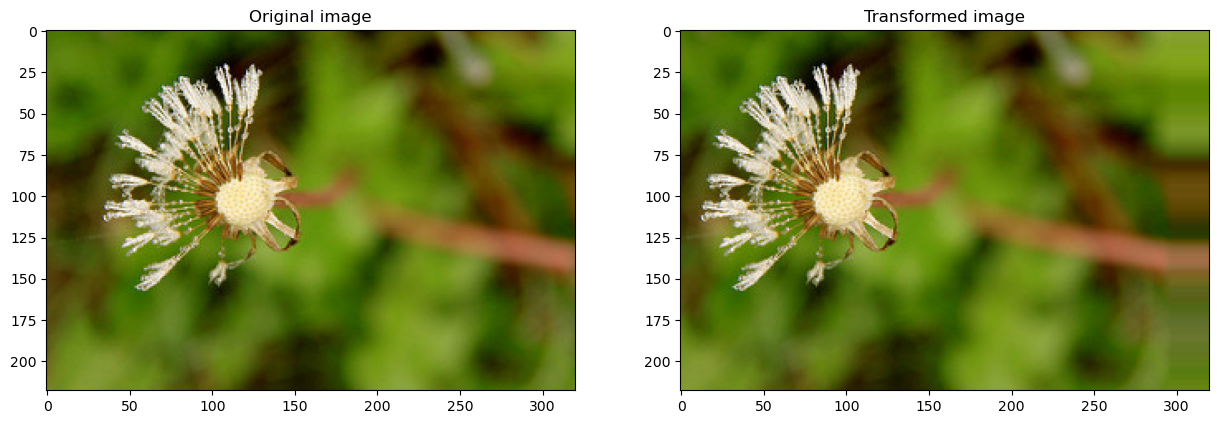

In [15]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=50)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

Horizontal Shift

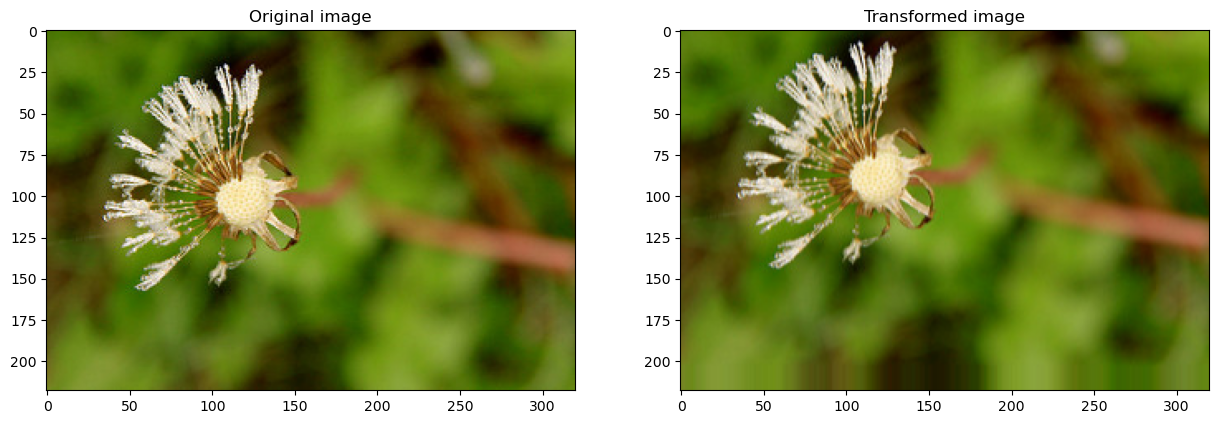

In [16]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.20)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Rotating image

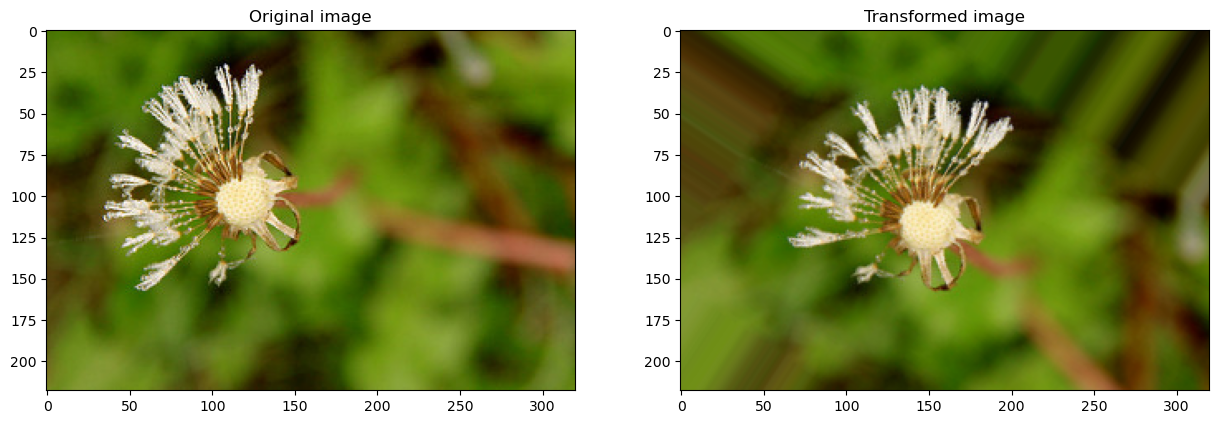

In [17]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=50)
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Zooming image

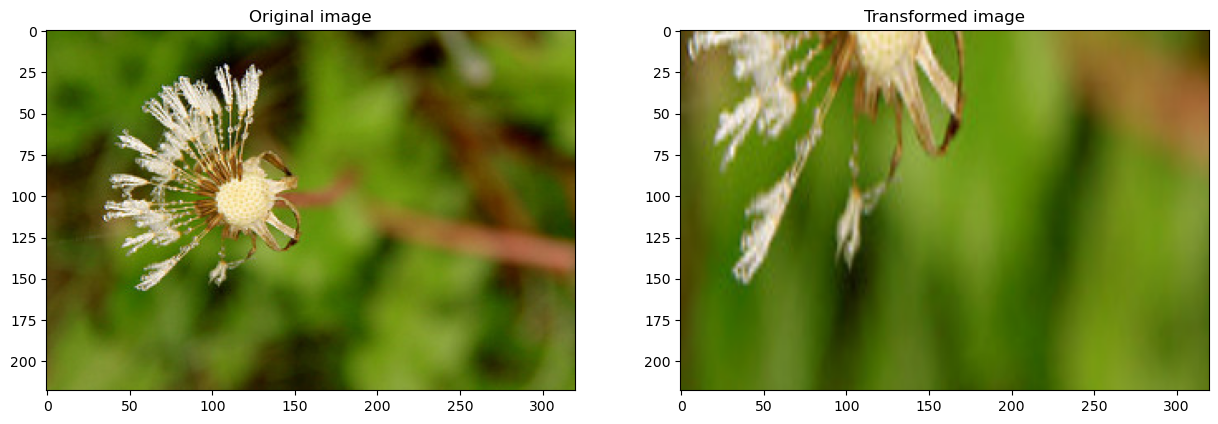

In [18]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.3, 1.5])
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)

### Applying multiple transforms

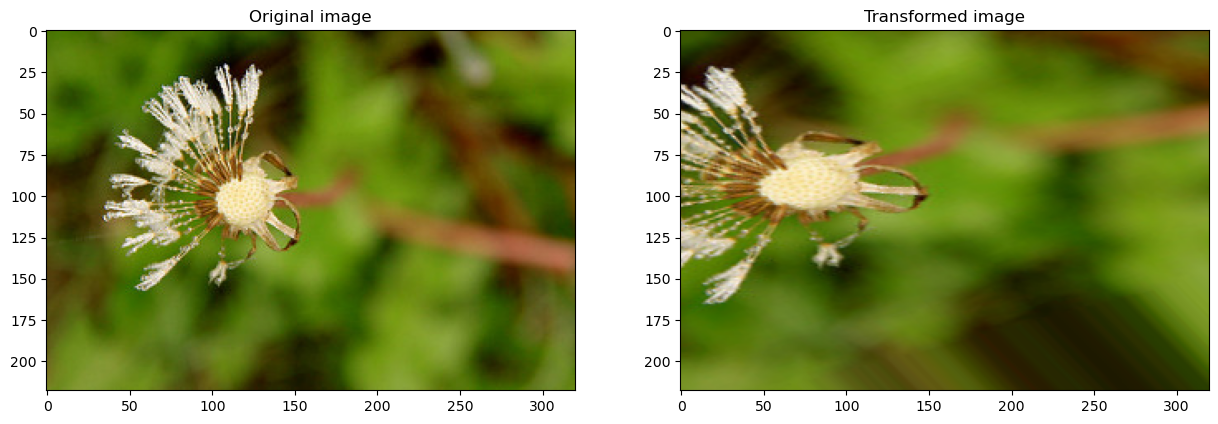

In [19]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=[0.3,1.5])
transformed_array = transform_fn.random_transform(flower_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(flower_image, transformed_image)